#### $\text{Michael Higgins, Sierra Wilde}$

# $$\text{Lab 6:}$$

## Problem 1:

I am creating a fake background for this lab since I chose the LHC data.

In order to make a fake background I decided to generate 100,000 random poisson distributed numbers using scipy.stats.poisson.rvs. I made it so the Poisson distribution has $\mu =100$. Since I am generating a backgound with a lot of simulated data I know that the distribution is truly Poisson with $\mu =100$ so I also create the PMF using stats.poisson.pmf and multiplying it by the number of random values I generated so it has the same scale as my simulated data rather than percentages on the y axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [9]:
#Generating the random data in a poisson distribution and the Poisson PMF
size = 100000
poisson_dist = stats.poisson.rvs(100,size=size)

#Creating my PMF to fit my data
x= np.arange(poisson_dist.min(),poisson_dist.max())
pmf = stats.poisson.pmf(x,100)*size

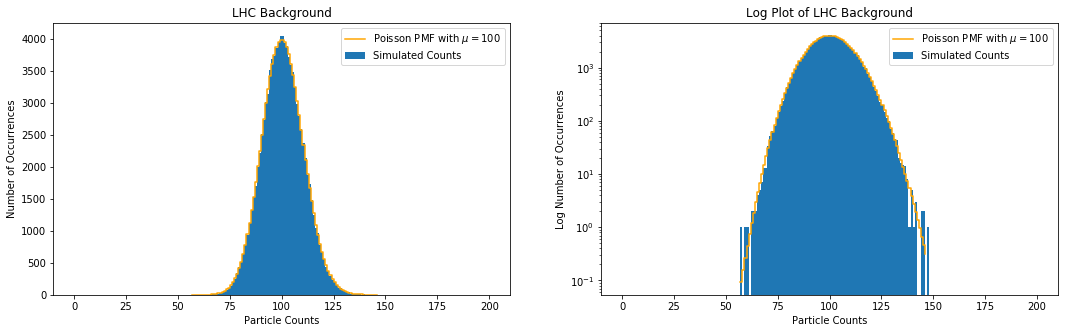

In [15]:
#Plotting the simulated background distribution and also the Poisson PMF with a mean of 100
fig,ax = plt.subplots(1,2,figsize=(18,5))

ax[0].hist(poisson_dist,bins=np.arange(0,201),width=1,label = "Simulated Counts")
ax[0].set_title('LHC Background')
ax[0].set_xlabel('Particle Counts')
ax[0].set_ylabel('Number of Occurrences')
ax[0].step(x,pmf,color='orange',label=r'Poisson PMF with $\mu=100$',where='post')
ax[0].legend()

ax[1].hist(poisson_dist,bins=np.arange(0,201),width=1,label = "Simulated Counts")
ax[1].set_title('Log Plot of LHC Background')
ax[1].set_xlabel('Particle Counts')
ax[1].set_ylabel('Log Number of Occurrences')
ax[1].step(x,pmf,color='orange',label=r'Poisson PMF with $\mu=100$',where='post')
ax[1].set_yscale('log')
ax[1].legend();

Since the Poisson distribution that I generated has a mean of 100 and a size of 100,000 , I can use the Poisson PMF from scipy.stats to find the 5$\sigma$ upper and lower threshold. This is because there are enough generated values to adequately be described by the perfect Poisson PMF with a mean of 100. In order to get the 5$\sigma$ threshold for the upper end, I will use stats.norm.sf(5) to find the probability of having a value $\geq 5$ on a normal curve. I will then use stats.poisson.isf(probability,mu=100) to find the value of particle counts on my background that corresponds to the 5$\sigma$ probability I obtained from the normal curve. In order to get the 5$\sigma$ threshold for the lower end, I will do the same thing but use stats.poisson.ppf(probability,mu=100) to find my lower end threshold.

In [4]:
#Getting the 5 sigma probability
probability = stats.norm.sf(5)

#Finding the upper and lower 5 sigma threshold for my Poisson distributed background and printing it
upper_threshold = stats.poisson.isf(probability,100)
lower_threshold = stats.poisson.ppf(probability,100)
print("My lower 5sigma threshold is {0:g} particle counts for my LHC background.".format(lower_threshold))
print("My upper 5sigma threshold is {0:g} particle counts for my LHC background.".format(upper_threshold))

My lower 5sigma threshold is 54 particle counts for my LHC background.
My upper 5sigma threshold is 154 particle counts for my LHC background.


These results are interesting because the reveal a feature of the Poisson distribution. We can see that the $5\sigma$ threshold from the left is closer to the mean than the threshold from the right, -46 and +54 from the mean of 100 respectfully. This just tells me that the poisson distribution is not perfectly symmetric about its mean. Essentially the background distribution is slighty skewed to the right. 

## Problem 2:

For this problem I have chosen to inject 100,000 signals of an $8\sigma$ signal strength. I found this strength  by using stats.norm.sf(8) to give me the probability in a Normal distribution to get a value > 8 and then used stats.poisson.isf(probability,100) to give me the signal value from the poisson distribution that corresponds to that probability.

In [13]:
#Getting my signal value (190)
signal8sigma = stats.poisson.isf(stats.norm.sf(8),100)

#Using a 1D array of the Poisson dist from problem as my noise
noise = poisson_dist

#Creating my observed signal by adding my noise to my injected signal of 190
injected_signal = np.ones(int(size))*signal8sigma
obs_signal = noise+injected_signal

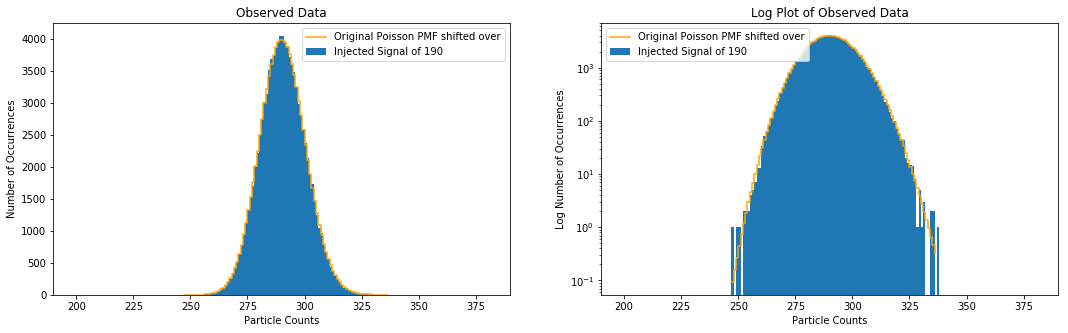

In [16]:
fig,ax = plt.subplots(1,2,figsize=(18,5))

ax[0].hist(obs_signal,bins=np.arange(190,391),width=1,label="Injected Signal of 190");
ax[0].set_title('Observed Data')
ax[0].set_xlabel('Particle Counts')
ax[0].set_ylabel('Number of Occurrences')
ax[0].step(x+190,stats.poisson.pmf(x,100)*size,color='orange',label=r'Original Poisson PMF shifted over',where='post')
ax[0].set_xlim(190,390)
ax[0].legend()

ax[1].hist(obs_signal,bins=np.arange(190,391),width=1,label="Injected Signal of 190");
ax[1].set_title('Log Plot of Observed Data')
ax[1].set_xlabel('Particle Counts')
ax[1].set_ylabel('Log Number of Occurrences')
ax[1].set_yscale('log')
ax[1].step(x+190,stats.poisson.pmf(x,100)*size,color='orange',label=r'Original Poisson PMF shifted over',where='post')
ax[1].set_xlim(190,390)
ax[1].legend();


### a).

The histogram has the same shape as our noise and this makes sense because we are injecting our signal onto our Poisson noise which adds onto it because our noise is our background. Essentially it tell us that if there is a systematic that creates a particular background(noise), then a injected signal also has that background added to it so our injected signal over many injections approaches the shape of the background. This can be seen by shifting the original PMF over and plotting it over top of the observed signal distribution and in the log plot we can visual see the shape is the same as the background. It may be important to note that our observed signal is NOT a Poisson PMF with a mean of 290 since due to the central limit theorem the larger the mean for our Poisson distribution the more Guassian-like it becomes and thus, changing the shape. It is a Poisson distribution with a mean of 100 with a location of center shifted over by 190.

### b).

The observed signal is biased since it is always going to be stronger than the true injected signal. This bias is caused by our background having a mean of 100. This means that a lot of injected signals of 0 particle counts would appear as our background poisson distribution which is consistently always greater than 0 in value. 

Is our signal symmetric? No. There are basically two ways to explain why it is not symmetric. Looking at the $5\sigma$ thresholds from problem 1 we know that the distribution is skewed to the right because the upper threshold is further from the mean than the lower threshold. This means that there are more occurrences at stronger signals than lower signals because we need to go further to the right for the integral of our PMF to have a $5\sigma$ probability than we need to go left for our lower threshold. And since our observed signal and background have the same shape this means that our observed signal is also skewed to the right like our background. Another way to explain this, a Poisson distribution is non-symmetic unless the mean is extremely large such that the Central Limit Theorem makes the shape approach a Guassian which is symmetric and our mean is not large enough to be considered symmetric at $5\sigma$

## Problem 3:

### a).

I am simulating an set of injected signals of signal strengths from 0 to $30\sigma$ which corresponds to 0 to 527 particle counts with 100,000 injections for each value. Then I am simulating the observed signals by adding my Poisson background noise to each injected signal strength, this can be done a variety of ways but my approach was making a 2D array of injected signals with 100,000 of each signal from 0 to 527 and then making a 2D array that is the same shape as my injected signal array and adding my background of 100,000 data points to each injected signal strength. I then flatten both of my 2D arrays into 1D arrays so I can make a 2D histogram with 1 dimension being my observed signals and the other being my injected signals.

In [217]:
#Making a list of probabilities from the normal curve from 0 sigma to 30 sigma
list_of_probabilities = stats.norm.sf(np.arange(0,31))

In [225]:
#Finding the values from my background the correspond closest to the minimum of my list of probabilities
stats.poisson.sf(527,100),stats.poisson.sf(528,100)

(4.547845082529376e-198, 8.593286946225263e-199)

In [218]:
list_of_probabilities.min()

4.906713927147908e-198

527 is the closest integer value we can get to the equivalent probability of a 30$\sigma$ detection.

In [18]:
injected_sig = np.arange(0,528)

In [19]:
ones = np.ones(shape=(size,len(injected_sig)))

In [20]:
injected_signal_array = ones*injected_sig
observed_signal_array = injected_signal_array.T + ones.T*poisson_dist


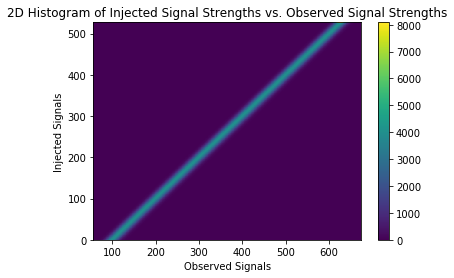

In [21]:
plt.hist2d(observed_signal_array.flatten(),injected_signal_array.T.flatten(),bins=(observed_signal_array.flatten().max()-observed_signal_array.flatten().min(),injected_signal_array.T.flatten().max()),cmap=plt.cm.viridis);
plt.colorbar()
plt.title('2D Histogram of Injected Signal Strengths vs. Observed Signal Strengths')
plt.xlabel('Observed Signals')
plt.ylabel('Injected Signals');

Looking at the 2D histogram it is apparent that with our noise it causes our injected signals to correspond to observed signals that have strengths shifted by about +100 and they have a Poisson shape caused by our background. The linearity of the 2D histogram is caused by the fact that our background has a mean of 100 so each injected signal strength is shifted over by values close to 100 that are created by the Poisson distributed background. We can see that the center of the 'line' in the histogram has a value of about 4000 occurrences which is the same number of occurrences we had at the peaks of our previous histograms so this 2D histogram make sense physically because it is just a bunch of our previous histograms stacked on top of eachother with occurrences now represented by color.

### b).

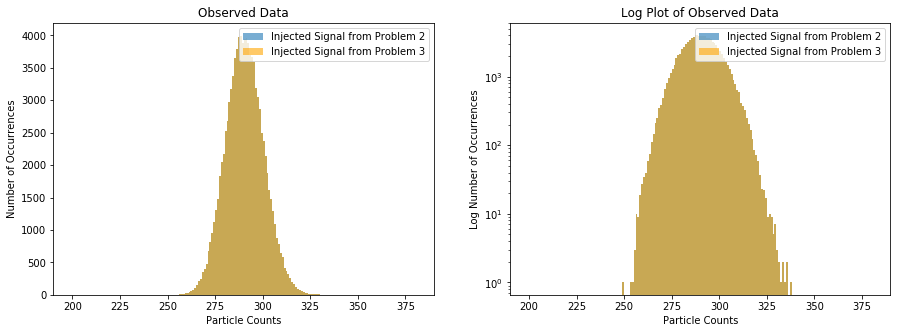

In [242]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].hist(obs_signal,bins=np.arange(190,391),width=1,alpha=.6,label="Injected Signal from Problem 2");
ax[0].set_title('Observed Data')
ax[0].set_xlabel('Particle Counts')
ax[0].set_ylabel('Number of Occurrences')
ax[0].hist(observed_signal_array[190],bins=np.arange(0,528),color='orange',alpha=.6,label='Injected Signal from Problem 3')
ax[0].set_xlim(190,390)
ax[0].legend()

ax[1].hist(obs_signal,bins=np.arange(190,391),width=1,alpha=.6,label="Injected Signal from Problem 2");
ax[1].set_title('Log Plot of Observed Data')
ax[1].set_xlabel('Particle Counts')
ax[1].set_ylabel('Log Number of Occurrences')
ax[1].set_yscale('log')
ax[1].hist(observed_signal_array[190],bins=np.arange(0,528),color='orange',alpha=.6,label='Injected Signal from Problem 3')
ax[1].set_xlim(190,390)
ax[1].legend();

Above is a plot of the observed data from a injected signal of 190 and we can see that the two overlap perfectly meaning they are the same. This is because I used the same size, and Poisson distribution from problem 2 in problem 3. The only difference with problem 3 is that I also have these histograms for any integer value from 0 to 527 for an injected signal by taking horizontal slices from my 2D histogram.

### c).

I chose an observed signal of 300 since it is greater than the $5\sigma$ threshold but less than the $30\sigma$ threshold for my background.

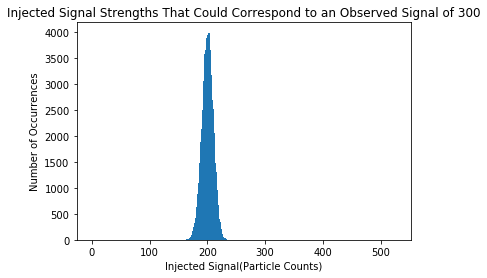

In [244]:
observed=300
plt.hist(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-observed)<.005)],bins=np.arange(0,528))
plt.title('Injected Signal Strengths That Could Correspond to an Observed Signal of 300')
plt.xlabel('Injected Signal(Particle Counts)')
plt.ylabel('Number of Occurrences');

This histogram shows a vertical slice from my 2D histogram. Essentially, this histogram shows all of the possible injected signals that could have resulted in an observed signal of 300. 

### d).

In [246]:
#Using numpy quantile to look at my data and determine what value in my data corresponds to -1sigma probability and +1sigma probability
np.quantile(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-observed)<.005)],[stats.norm.cdf(-1),stats.norm.cdf(1)])

array([190., 210.])

In [249]:
np.quantile(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-observed)<.005)],.5)

200.0

Using numpy quantile on my histogramed data from part c). gives me the values from my data that correspond to -1$\sigma$ and +1$\sigma$ which is 190 and 210 respectfully. Below that interval I have used the quantile to find the mean of my data to the nearest whole integer. This gives me my $1\sigma$ confidence interval which essentially tells me what the strengths my injected signal could have been between 68% of the time if I had an observed signal of 300.

### e).

It is biased and this makes sense because we would see that with an observed signal stength of 300 we would essentially always have an actual injected signal strength that was less than 300. From my previous answer in d you would think it is symmetric because the mean and the upper and lower 1$\sigma$ thresholds are equally spaced, however it is not symmetric. At a 5$\sigma$ uncertainty we would see that the mean and the upper and lower 5$\sigma$ thresholds are not equally spaced. This makes sense because our data is simulated from a non-symmetric distribution so it would also be the case that our histogram of possible injected signal strengths is also non-symmetric.

In [250]:
#The 5sigma uncertainty thresholds
np.quantile(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-observed)<.005)],[stats.norm.cdf(-5),stats.norm.cdf(5)])

array([153.05732974, 240.88534052])

## Problem 4:


### a).

In [251]:
chosen_obs_signal

108.0

I have chose a observed signal of 108 which corresponds to the 0.8$\sigma$ probability signal strength from the background.

In [232]:
chosen_obs_signal = stats.poisson.isf(stats.norm.sf(.8),100)

This histogram shows a vertical slice from my 2D histogram. Essentially, this histogram shows all of the possible injected signals that could have resulted in an observed signal of 108. 

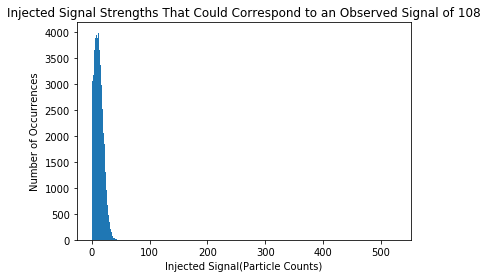

In [252]:
plt.title('Injected Signal Strengths That Could Correspond to an Observed Signal of 108')
plt.xlabel('Injected Signal(Particle Counts)')
plt.ylabel('Number of Occurrences');
plt.hist(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-chosen_obs_signal)<.005)],bins=np.arange(0,528));

In [253]:
#minimum value of my histogram
injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-chosen_obs_signal)<.005)].min()

0.0

We can see the the minimum value of my injected signal from the above histogram is 0 so the our distribution extends to 0.

### b).

What it means to have our true signal pdf extend to 0 is that we could have had a reading of 0 signal strength(no particle counts) and observed signal of strength 108 particle counts. This make sense because our background is the noise we see with no signals, it is caused by a systematic of the detector or experiment.

### c).

In [254]:
#Using numpy quantile to look at my data and determine what value in my data corresponds to a true signal that would be less than that value 95% of the time.
np.quantile(injected_signal_array.T.flatten()[np.where(np.absolute(observed_signal_array.flatten()-chosen_obs_signal)<.005)],.95)

25.0

If I observe this a signal of strength 108 (and it is too weak to claim a detection), then the true signal strength would be less than 25 95% of the time. This means that only 5% of the time I would expect to have a value greater than 25 correspond to a observed signal of strength 108. This makes sense because this histogram is from a vertical slice of my 2D histogram which was simulated with the assumption of a background with a mean of 100. All of this leads to histograms that will be biased and thus, it makes sense we can observe a signal of a strength much greater than the true signal strength would have been.